# NEW POI Analysis (Google Places)

In [1]:
import os

os.chdir("/home/tales/dev/master/mdc_analysis/")
print("working dir", os.getcwd())

import pandas as pd
import matplotlib.pyplot as plt
import json

from src.poi_grabber import google_places

working dir /home/tales/dev/master/mdc_analysis


In [2]:
d = google_places.load_all_google_places_data(valid_pois=True)
print(len(d))

41873


In [3]:
d.head()

,name,place_id,plus_code,price_level,rating,types,user_ratings_total,vicinity,latitude,longitude
place_id,,,,,,,,,,
ChIJTcpEIDQujEcRfRIRizbvj4k,Office d'impôt des districts de Lausanne et Ou...,ChIJTcpEIDQujEcRfRIRizbvj4k,"{'compound_code': 'GJCQ+J2 Lausanne, Switzerla...",NaN,2.2,"[accounting, finance, point_of_interest, local...",30.0,"Rue Caroline 11 Bis, Lausanne",46.521553,6.637505
ChIJPV-d_9dkjEcRh-AFXijs5H0,Graphiste Imprimeur Genève Agence BESTRIBUTION,ChIJPV-d_9dkjEcRh-AFXijs5H0,"{'compound_code': '644R+WJ Geneva, Switzerland...",NaN,NaN,"[store, point_of_interest, establishment]",NaN,"Rue de Cornavin 3, Genève",46.207296,6.141589
ChIJ6TtT3J1EjEcRdmsz6L2gHTU,institut beauté lys,ChIJ6TtT3J1EjEcRdmsz6L2gHTU,"{'compound_code': 'C7F6+9W Gland, Switzerland'...",NaN,4.2,"[beauty_salon, point_of_interest, establishment]",6.0,"Rue du Borgeaud 10B, Gland",46.423477,6.262349
ChIJLZi4AC8ujEcRvSGJiRYVAk0,cabinet evexia | coaching & soins thérapeutiques,ChIJLZi4AC8ujEcRvSGJiRYVAk0,"{'compound_code': 'GJFH+W6 Lausanne, Switzerla...",NaN,NaN,"[health, point_of_interest, establishment]",NaN,"Rue Saint-Roch 30, Lausanne",46.524868,6.628072
ChIJKTbDs6ygmkcRhp_reVwKcjc,RTM Financial Coaching AG,ChIJKTbDs6ygmkcRhp_reVwKcjc,"{'compound_code': '9G8W+HX Zürich, Switzerland...",NaN,NaN,"[finance, point_of_interest, establishment]",NaN,"Gottfried-Keller-Strasse 7, Zürich",47.366456,8.547460


## Types

### diversity

In [4]:
types_list = pd.Series(d["types"].sum())
types_list = types_list[(types_list != "establishment") & (types_list != "point_of_interest")]
types_list = types_list.apply(lambda value : pd.Series(value).drop_duplicates().tolist()[0])

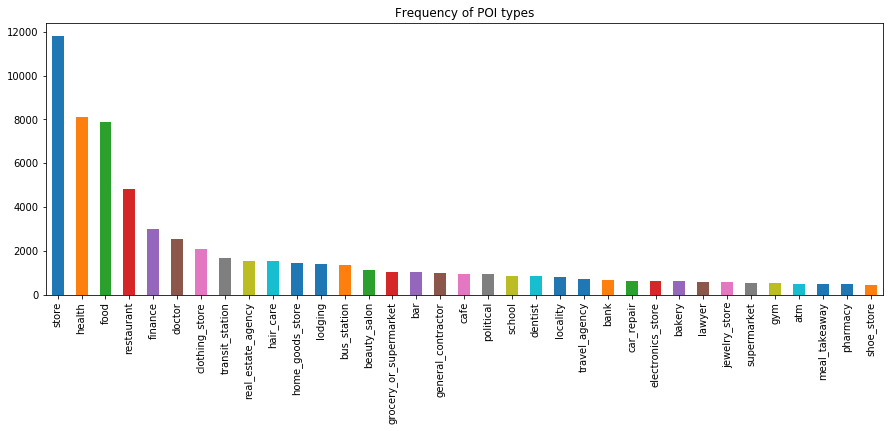

In [5]:
f, ax = plt.subplots(figsize=(15,5))
types_list.astype(str).value_counts().head(35).plot.bar(title="Frequency of POI types")

### size

In [6]:
d["types"].head()

place_id
ChIJTcpEIDQujEcRfRIRizbvj4k    [accounting, finance, point_of_interest, local...
ChIJPV-d_9dkjEcRh-AFXijs5H0            [store, point_of_interest, establishment]
ChIJ6TtT3J1EjEcRdmsz6L2gHTU     [beauty_salon, point_of_interest, establishment]
ChIJLZi4AC8ujEcRvSGJiRYVAk0           [health, point_of_interest, establishment]
ChIJKTbDs6ygmkcRhp_reVwKcjc          [finance, point_of_interest, establishment]
Name: types, dtype: object

In [7]:
types_list.head().apply(len)

0    10
1     7
3    23
5     5
8    12
dtype: int64

In [8]:
types_list.apply(len).describe()

count    75992.000000
mean         8.439638
std          4.479746
min          3.000000
25%          5.000000
50%          7.000000
75%         11.000000
max         27.000000
dtype: float64

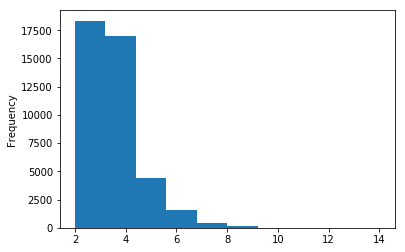

In [9]:
d["types"].apply(len).plot.hist(bins=10)

#### Types of similar places

In [10]:
d[d["name"] == "McDonald’s"]["types"].astype(str).value_counts()

['restaurant', 'meal_takeaway', 'cafe', 'food', 'point_of_interest', 'establishment']    21
['restaurant', 'meal_takeaway', 'food', 'point_of_interest', 'establishment']            18
Name: types, dtype: int64

## Useful functions

In [11]:
def term_list_index(term, lista):
    if term in lista:
        return lista.index(term)
    else:
        return -1

def term_index_len(term, types_series):
    term_index = types_series.apply(lambda lista : term_list_index(term, lista))
    term_types_len = types_series.apply(lambda lista : len(lista))

    return pd.DataFrame({"index": term_index, "len": term_types_len})

def left_right_term(term, types_series):
    lefts = []
    rights = []

    term_index_len_df = term_index_len(term, types_series)

    for type_row in types_series.loc[term_index_len_df[term_index_len_df["index"] >= 0].index]:
        left = type_row[0:type_row.index(term)]
        lefts = lefts + left
        right = type_row[type_row.index(term) + 1:]
        rights = rights + right

    lefts = pd.Series(lefts).rename({0: "left"})
    rights = pd.Series(rights).rename({0: "right"})

    lr = lefts.value_counts().to_frame().merge(rights.value_counts().to_frame(), how="outer",
                                                 left_index=True,
                                                 right_index=True)
    
    return lr.sort_values(by=["0_x", "0_y"], ascending=False).rename({"0_x": "left", "0_y": "right"}, axis=1)

def term_placement_analisis(lr, show=True):
    right = lr[(lr["left"].isna()) & (~lr["right"].isna())]
    left = lr[(lr["right"].isna()) & (~lr["left"].isna())]
    both_valid = lr[~(lr["right"].isna()) & (~lr["left"].isna())]
    both_nan = lr[(lr["right"].isna()) & (lr["left"].isna())]
    
    if show:
    
        print("RIGHT side occurrences")
        print()
        print(right)
        print("---")
        print()
        print("LEFT side occurrences")
        print(left)
        print("---")
        print()
        print("BOTH sides occurrences")
        print(both_valid)
        print("---")
        print()
    return {"right": right, "left": left, "both": both_valid}

# Searching for hierarchy patterns

In [12]:
n_cases = d["types"].apply(lambda lista : "health" in lista).value_counts()
print("'health' happens in {:10.2f}% of cases".format(n_cases[True] * 100 / n_cases.sum()))

'health' happens in      19.32% of cases


In [13]:
def term_list_index(term, lista):
    if term in lista:
        return lista.index(term)
    else:
        return -1

In [14]:
health_index = d["types"].apply(lambda lista : term_list_index('health', lista))
health_types_len = d["types"].apply(lambda lista : len(lista))

health = pd.DataFrame({"index": health_index, "len": health_types_len})

#### Index occurrence in types list and types list length

In [15]:
health[health["index"] >= 0].sample(6)

,index,len
place_id,,
ChIJO5i3uIoujEcRa4aAdBKzoFI,0,3
ChIJHTO5LDDcjkcRjoxHnXR4eA4,1,5
ChIJJ5er_tVkjEcRWaqit4hmEPg,1,4
ChIJ-3OUYCM4jEcRRhx2_eBG0MM,1,4
ChIJA4OJBNYxjEcRVk05BceeXX0,0,3
ChIJswvKt1EqkEcRfefy--P8wmU,1,4


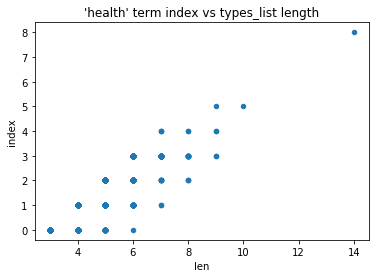

In [16]:
health[health["index"] >= 0].plot.scatter("len", "index", title="'health' term index vs types_list length")

In [17]:
health.loc[health[(health["len"] >= 8) & (health["index"] >= 0)].index].sample(6)

,index,len
place_id,,
ChIJ_Vxg8nowjkcRBJo5ohVpMvw,4,8
ChIJV2pXhIYrjEcROHKns0IrRZk,3,8
ChIJuUlEicWXjkcRXZagsxwPjhc,2,8
ChIJN8A0NtIojEcRFRKbyWOYic0,3,8
ChIJdw-MwAfSj0cRCkl5YAgPobc,2,8
ChIJnaMlAXNjjEcRNydrX-VgRnw,8,14


In [18]:
health_lr = left_right_term('health', d["types"])
lr = term_placement_analisis(health_lr)

RIGHT side occurrences

                         left   right
establishment             NaN  8089.0
point_of_interest         NaN  8089.0
food                      NaN    71.0
local_government_office   NaN    18.0
restaurant                NaN    13.0
lodging                   NaN     8.0
general_contractor        NaN     2.0
laundry                   NaN     1.0
---

LEFT side occurrences
                          left  right
doctor                  2526.0    NaN
dentist                  877.0    NaN
gym                      519.0    NaN
pharmacy                 472.0    NaN
physiotherapist          448.0    NaN
hair_care                286.0    NaN
beauty_salon             164.0    NaN
spa                      153.0    NaN
insurance_agency          98.0    NaN
clothing_store            80.0    NaN
finance                   32.0    NaN
shoe_store                28.0    NaN
grocery_or_supermarket    25.0    NaN
home_goods_store          16.0    NaN
veterinary_care           15.0    NaN

### left vs right: term ocurrences 

In [19]:
# unique_types_list = pd.Series(types.sum()).drop_duplicates()

In [20]:
# types_list = pd.Series(types.sum())

In [21]:
# types_list[(types_list != 'establishment') & (types_list != 'point_of_interest')].value_counts()

In [22]:
# term = unique_types_list.sample().item()
# term

In [23]:
term = "school"

print("Occurrences for term: {}".format(term))
print("\n\n")
lr_health = left_right_term(term, d["types"])
lr = term_placement_analisis(lr_health)

Occurrences for term: school



RIGHT side occurrences

                         left  right
establishment             NaN  879.0
point_of_interest         NaN  879.0
general_contractor        NaN    1.0
local_government_office   NaN    1.0
---

LEFT side occurrences
                 left  right
gym              20.0    NaN
food              3.0    NaN
beauty_salon      2.0    NaN
hair_care         2.0    NaN
physiotherapist   2.0    NaN
travel_agency     2.0    NaN
art_gallery       1.0    NaN
bar               1.0    NaN
doctor            1.0    NaN
furniture_store   1.0    NaN
lawyer            1.0    NaN
mosque            1.0    NaN
museum            1.0    NaN
restaurant        1.0    NaN
shoe_store        1.0    NaN
spa               1.0    NaN
---

BOTH sides occurrences
                   left  right
health             45.0    8.0
university         21.0    7.0
home_goods_store   12.0    1.0
electronics_store  10.0    1.0
accounting          3.0    2.0
finance             3.0  

In [24]:
term = "bar"

print("Occurrences for term: {}".format(term))
print("\n\n")
lr_health = left_right_term(term, d["types"])
lr = term_placement_analisis(lr_health)

Occurrences for term: bar



RIGHT side occurrences

                   left   right
establishment       NaN  1049.0
point_of_interest   NaN  1049.0
food                NaN   546.0
store               NaN    88.0
lodging             NaN    65.0
meal_takeaway       NaN    32.0
spa                 NaN     8.0
movie_theater       NaN     2.0
place_of_worship    NaN     2.0
university          NaN     2.0
health              NaN     1.0
home_goods_store    NaN     1.0
laundry             NaN     1.0
natural_feature     NaN     1.0
school              NaN     1.0
storage             NaN     1.0
---

LEFT side occurrences
                        left  right
bowling_alley            4.0    NaN
parking                  4.0    NaN
casino                   3.0    NaN
grocery_or_supermarket   3.0    NaN
beauty_salon             2.0    NaN
airport                  1.0    NaN
clothing_store           1.0    NaN
gym                      1.0    NaN
hair_care                1.0    NaN
shopping_mall   

In [25]:
term = "store"

print("Occurrences for term: {}".format(term))
print("\n\n")
lr_health = left_right_term(term, d["types"])
lr = term_placement_analisis(lr_health)

Occurrences for term: store



RIGHT side occurrences

                         left    right
establishment             NaN  11807.0
point_of_interest         NaN  11807.0
lodging                   NaN     18.0
local_government_office   NaN      1.0
natural_feature           NaN      1.0
---

LEFT side occurrences
                     left  right
electronics_store   627.0    NaN
jewelry_store       567.0    NaN
supermarket         551.0    NaN
pharmacy            472.0    NaN
shoe_store          465.0    NaN
furniture_store     442.0    NaN
cafe                354.0    NaN
convenience_store   289.0    NaN
car_repair          235.0    NaN
florist             226.0    NaN
car_dealer          219.0    NaN
gas_station         167.0    NaN
bicycle_store       132.0    NaN
hair_care           131.0    NaN
beauty_salon        121.0    NaN
meal_takeaway       108.0    NaN
bar                  88.0    NaN
department_store     83.0    NaN
finance              64.0    NaN
plumber              53.

In [26]:
term = "hair_care"

print("Occurrences for term: {}".format(term))
print("\n\n")
lr_health = left_right_term(term, d["types"])
lr = term_placement_analisis(lr_health)

Occurrences for term: hair_care



RIGHT side occurrences

                    left   right
establishment        NaN  1531.0
point_of_interest    NaN  1531.0
health               NaN   286.0
store                NaN   131.0
hospital             NaN     6.0
home_goods_store     NaN     2.0
school               NaN     2.0
bar                  NaN     1.0
food                 NaN     1.0
general_contractor   NaN     1.0
lodging              NaN     1.0
restaurant           NaN     1.0
university           NaN     1.0
---

LEFT side occurrences
                 left  right
beauty_salon    283.0    NaN
clothing_store    4.0    NaN
dentist           1.0    NaN
shoe_store        1.0    NaN
---

BOTH sides occurrences
        left  right
spa      1.0   97.0
doctor   1.0   20.0
---



In [27]:
term = "natural_feature"

print("Occurrences for term: {}".format(term))
print("\n\n")
lr_health = left_right_term(term, d["types"])
lr = term_placement_analisis(lr_health)

Occurrences for term: natural_feature



RIGHT side occurrences

                   left  right
establishment       NaN    7.0
point_of_interest   NaN    7.0
---

LEFT side occurrences
            left  right
food         2.0    NaN
bar          1.0    NaN
lodging      1.0    NaN
pet_store    1.0    NaN
restaurant   1.0    NaN
store        1.0    NaN
---

BOTH sides occurrences
Empty DataFrame
Columns: [left, right]
Index: []
---



# Type popularity vs right / left

In [28]:
types_list_freq = types_list[(types_list != 'establishment') & (types_list != 'point_of_interest')].value_counts()
types_list_freq = types_list_freq.to_frame().rename(columns={0: "freq_index"})
types_list_freq = types_list_freq.sort_values(by="freq_index", ascending=False).reset_index().rename(columns={"index": "term"}).reset_index()
types_list_freq.head()

,index,term,freq_index
0,0,store,11807
1,1,health,8089
2,2,food,7873
3,3,restaurant,4831
4,4,finance,3008


In [29]:
r_prop = []

for term in types_list_freq["term"]:
    lr = term_placement_analisis(left_right_term(term, d["types"]), show=False)
    r_prop.append({"term": term, "r_prop": len(lr["right"]) / (len(lr["left"]) + len(lr["right"]))})
    
r_prop = pd.DataFrame(r_prop).sort_values(by="r_prop", ascending=False)
r_prop = r_prop.sort_values(by="r_prop", ascending=False).reset_index(drop=True).reset_index()
r_prop.tail()

,index,r_prop,term
103,103,0.086957,food
104,104,0.076923,lodging
105,105,0.076923,general_contractor
106,106,0.075758,store
107,107,0.062500,local_government_office


In [30]:
r_prop_vs_freq_index = r_prop.merge(types_list_freq, left_on="term", right_on="term", how="inner").rename(columns={"index_x": "index_r_prop", "index_y": "index_freq"})
r_prop_vs_freq_index.head()

,index_r_prop,r_prop,term,index_freq,freq_index
0,0,1.0,aquarium,107,1
1,1,1.0,neighborhood,91,24
2,2,1.0,hindu_temple,104,3
3,3,1.0,synagogue,103,3
4,4,1.0,courthouse,101,7


In [31]:
r_prop_vs_freq_index["index_r_prop"].corr(r_prop_vs_freq_index["index_freq"], method="spearman")

-0.6070669829565482

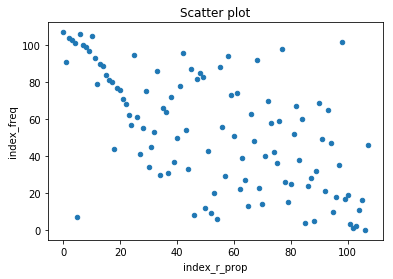

In [32]:
r_prop_vs_freq_index.plot.scatter(x="index_r_prop", y="index_freq", title="Scatter plot")

The more frequent the term is, the less right side elements it has

# Analising leftmosts categories

In [33]:
def remove_words_from_list(lista, words_to_remove=["establishment", "point_of_interest"]):
    for word_to_remove in words_to_remove:
        if word_to_remove in lista:
            lista.remove(word_to_remove)
    return lista

In [34]:
clean_types = d["types"].apply(lambda value : remove_words_from_list(value))
leftmost = clean_types[clean_types.astype(str) != "[]"].apply(lambda value : value[-1])

print(len(leftmost.drop_duplicates()), "leftmost categories")

67 leftmost categories


# <font color="red">Ontology-based category system</font>

In [35]:
types_list_unique = pd.Series(types_list).drop_duplicates()

In [36]:
len(types_list_unique)

108

In [37]:
def to_dict(lista):
    num_dict = {}
    for i in range(len(lista)):
        num_dict[str(i)] = lista[i]
    return num_dict

def pretty_print_categ_dict(categ_dict):
    for key in range(len(categ_dict.keys())):
        print("{}: {}".format(key, categ_dict[str(key)]))

In [38]:
with open('../poi_catogories/data/poi_categories.json', 'r') as json_file:
    categories = sorted(json.load(json_file))

In [39]:
categ_dict = to_dict(categories)
categ_dict

{'0': 'Accommodation',
 '1': 'Business buildings',
 '10': 'Scientific Research & Education',
 '11': 'Shopping',
 '12': 'Tourist attraction',
 '13': 'Transportation Service',
 '14': 'Vehicle service',
 '2': 'Communal facilities',
 '3': 'Companies & Enterprises',
 '4': 'Financial and insurance',
 '5': 'Government &  social groups',
 '6': 'Life service',
 '7': 'Medical Care',
 '8': 'Recreation & Entertainment',
 '9': 'Restaurant service'}

### Mapping Types Categories 

In [40]:
categ_map = {}

In [41]:
# for a_type in types_list_unique:
#     pretty_print_categ_dict(categ_dict)
#     print()
#     print(">>> {}".format(a_type))
#     if a_type in categ_map.keys():
#         pass
    
#     else:
#         categ_keys = input("").split(",")
        
#         if categ_keys == ['']:
#             categ_values = ""
#         else:
#             categ_values = []
#             for categ_key in categ_keys:
#                 categ_values.append(categ_dict[categ_key])

#         categ_map[a_type] = categ_values
#     print(a_type, ">>>", categ_map[a_type])
#     print()
#     print("--------------")

In [42]:
# with open('../poi_catogories/data/categ_map.json', 'w') as outfile:
#     json.dump(categ_map, outfile)

In [43]:
with open('../poi_catogories/data/categ_map.json', "r") as json_file:
    categ_map = json.load(json_file)


In [44]:
def dict_to_df(a_dict, keys_colname, values_colname):
    rows = []
    for key in a_dict.keys():
        rows.append({keys_colname: key, values_colname: a_dict[key]})
    return pd.DataFrame(rows)

In [45]:
categ_df = dict_to_df(categ_map, "google_type", "new_types")
categ_df.to_csv('../poi_catogories/data/categ_map.csv', index=False)
categ_df

,google_type,new_types
0,accounting,"[Business buildings, Companies & Enterprises, ..."
1,finance,"[Business buildings, Companies & Enterprises, ..."
2,local_government_office,[Government & social groups]
3,store,"[Business buildings, Companies & Enterprises, ..."
4,beauty_salon,[Life service]
5,health,[Medical Care]
6,cafe,[Restaurant service]
7,food,[Restaurant service]
8,jewelry_store,"[Shopping, Business buildings]"
9,gym,"[Medical Care, Recreation & Entertainment]"


# <font color="red">Ontology-based category system - Analysis</font>

In [46]:
def expand_new_types(categ_df):
    expanded_rows = []
    
    for index, type_row in categ_df.iterrows():
        if len(type_row["new_types"]) == 0:
            expanded_rows.append({"google_type": type_row["google_type"],
                                  "new_type": ""})
            
        else:
            for new_type in type_row["new_types"]:
                expanded_rows.append({"google_type": type_row["google_type"],
                                      "new_type": new_type})
    
    return pd.DataFrame(expanded_rows)

expanded_categ_df = expand_new_types(categ_df)

## <font color="red">Empty Categories</font>

In [47]:
expanded_categ_df[expanded_categ_df["new_type"] == '']

,google_type,new_type
28,church,
29,place_of_worship,
35,lawyer,
46,general_contractor,
54,cemetery,
55,electrician,
56,bakery,
57,gas_station,
59,insurance_agency,
62,mosque,
